In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/housing-market-analysis/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/housing-market-analysis'

# Objectives
* The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

* The client is interested in predicting the house sale price from her four inherited houses and any other house in Ames, Iowa.

# Import packages

In [4]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OneHotEncoder

# Load Dataset

In [5]:
# Load dataset
df = pd.read_csv("/workspace/housing-market-analysis/outputs/datasets/collection/house-price-2021.csv")
df = df.sample(frac=0.2, random_state=101)
print(df.shape)
df.head(5)

#X = df.drop(columns=['SalePrice'])  # Extract features
#y = df['SalePrice']  # Extract target variable

#print(df.columns)
#df = df.fillna(0)
#df.info()


(58, 24)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
145,684,512.0,3.0,Mn,0,Unf,684,0.0,528,Unf,...,67.0,0.0,46,8,6,684,0.0,1920,2000,110000
81,1001,1001.0,3.0,No,284,BLQ,717,0.0,871,Unf,...,82.0,0.0,0,6,5,1001,0.0,1949,1950,145000
176,1557,0.0,2.0,Gd,0,Unf,1374,0.0,420,Fin,...,66.0,18.0,20,5,7,1374,0.0,2003,2004,234000
265,780,595.0,3.0,No,0,Unf,780,0.0,544,Unf,...,50.0,0.0,162,6,6,780,0.0,1937,1950,141000
165,2898,0.0,2.0,Av,1165,ALQ,0,0.0,665,Fin,...,66.0,0.0,72,6,8,1565,0.0,1976,1976,287000


---

# Data Exploration

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Study

* Used OneHotEncoder to transform categorical variables into a format that can be provided to machine learning algorithms.

In [7]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(6)

(58, 37)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_GLQ,BsmtFinType1_Rec,BsmtFinType1_LwQ,GarageFinish_Unf,GarageFinish_Fin,GarageFinish_RFn,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Fa,KitchenQual_Ex
145,684,512.0,3.0,0,684,0.0,528,2005.0,1196,12354,...,0,0,0,1,0,0,1,0,0,0
81,1001,1001.0,3.0,284,717,0.0,871,1949.0,2002,6270,...,0,0,0,1,0,0,0,1,0,0
176,1557,0.0,2.0,0,1374,0.0,420,2003.0,1557,3196,...,0,0,0,0,1,0,1,0,0,0
265,780,595.0,3.0,0,780,0.0,544,1979.0,1375,9000,...,0,0,0,1,0,0,1,0,0,0
165,2898,0.0,2.0,1165,0,0.0,665,1976.0,2898,15498,...,0,0,0,0,1,0,1,0,0,0
108,1061,862.0,3.0,674,76,0.0,564,1992.0,1923,10186,...,1,0,0,0,0,1,1,0,0,0


* Checked information for reassurance

In [8]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 145 to 144
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1stFlrSF          58 non-null     int64  
 1   2ndFlrSF          58 non-null     float64
 2   BedroomAbvGr      58 non-null     float64
 3   BsmtFinSF1        58 non-null     int64  
 4   BsmtUnfSF         58 non-null     int64  
 5   EnclosedPorch     58 non-null     float64
 6   GarageArea        58 non-null     int64  
 7   GarageYrBlt       58 non-null     float64
 8   GrLivArea         58 non-null     int64  
 9   LotArea           58 non-null     int64  
 10  LotFrontage       58 non-null     float64
 11  MasVnrArea        58 non-null     float64
 12  OpenPorchSF       58 non-null     int64  
 13  OverallCond       58 non-null     int64  
 14  OverallQual       58 non-null     int64  
 15  TotalBsmtSF       58 non-null     int64  
 16  WoodDeckSF        58 non-null     float64
 17  Y

Use .corr() for **spearman** and **pearson** methods, and investigate the top n correlations

* We know this command returns a pandas series and the first item is the correlation between SalePrice and SalePrice, which happens to be 1, so we exclude that with [1:]
* We sort values considering the absolute value, by setting key=abs

In [9]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual         0.865132
YearBuilt           0.710736
YearRemodAdd        0.700820
GrLivArea           0.694312
TotalBsmtSF         0.637913
GarageYrBlt         0.621030
1stFlrSF            0.603356
KitchenQual_TA     -0.602100
GarageArea          0.567598
GarageFinish_Unf   -0.482138
Name: SalePrice, dtype: float64

Now we do the same for **pearson**

In [10]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.826282
GrLivArea         0.670824
KitchenQual_Ex    0.646226
TotalBsmtSF       0.641128
GarageArea        0.633464
YearBuilt         0.616198
YearRemodAdd      0.610678
1stFlrSF          0.551544
KitchenQual_TA   -0.551359
GarageYrBlt       0.538916
Name: SalePrice, dtype: float64

In both methods, we observe correlations between Churn and individual variables to be moderate or strong. 
* OverallQual being the strongest among both methods.

* GarageYrBlt and GarageFinish_Unf are the weakest links in both methods.

    

* Ideally, we pursue strong correlation levels. Reason being is the available dataset may have limited information or may not capture all relevant factors influencing the variables of interest.


The top 8 correlation levels are considered at df_ohe and will study associated variable at df

In [11]:
top_n = 8
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual_Ex',
 'KitchenQual_TA',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

Therefore, in our analysis of the DataFrame (df). Moreover, we will explore the following variables to determine whether:

* A higher SalePrice is typically associated with the First Floor square feet  having a larger surface area **['1stFlrSF']**.

* A higher SalePrice is typically associated with a larger Size of garage in square feet **['GarageArea']**.
* A higher SalePrice is typically associated with the year the garage was built **['GarageYrBlt']**.
* A higher SalePrice is typically associated with a larger Above grade (ground) living area in square feet **['GrLivArea']**.
* A higher SalePrice is typically associated with a higher Rate of the overall material and finish of the house **['OverallQual']**.
* A higher SalePrice is typically associated with the total square feet of the basement area **['TotalBsmtSF']**.
* A higher SalePrice is typically associated with the original construction date **['YearBuilt']**. 
* A higher SalePrice is typically associated with the remodel date **['YearRemodAdd']**.

In [12]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

# Exploratory Data Analysis (EDA) on selected variables

In [13]:
df_expda = df.filter(vars_to_study + ['SalePrice']) # Filter out target variable and integrate to the feature variables
df_expda.head(5)

,1stFlrSF,GarageArea,GarageYrBlt,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
145,684,528,2005.0,1196,6,684,1920,2000,110000
81,1001,871,1949.0,2002,5,1001,1949,1950,145000
176,1557,420,2003.0,1557,7,1374,2003,2004,234000
265,780,544,1979.0,1375,6,780,1937,1950,141000
165,2898,665,1976.0,2898,8,1565,1976,1976,287000


# Variables Distribution by SalePrice
A visual ditribution representation (numerical) coloured by SalePrice

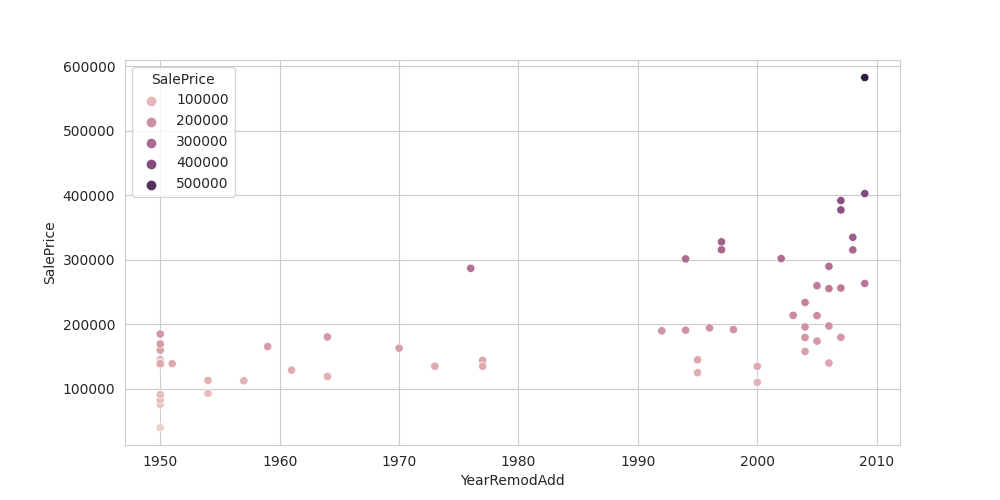

In [14]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
sns.set_style('whitegrid')

def numerical_plot(df, col, target_var):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=col, y=target_var, hue=target_var)
    plt.title(f"{col}", fontsize=15, y=1.5)
    plt.show()
    plt.savefig('numerical_plot.png')
    plt.close()


target_var = "SalePrice"
# f_var = "OverallQual"
for col in vars_to_study:
    numerical_plot(df_expda, col, target_var)
    print("\n\n")


plot_path = 'numerical_plot.png'

numerical_image = Image(plot_path)

display(numerical_image)


# Conclusions and next steps

The plots and correlations interpretation coverage.

* A higher SalePrice is typically associated with the First Floor square feet  having a larger surface area **['1stFlrSF']**.

* A higher SalePrice is typically associated with a larger Size of garage in square feet **['GarageArea']**.
* A higher SalePrice is typically associated with the year the garage was built **['GarageYrBlt']**.
* A higher SalePrice is typically associated with a larger Above grade (ground) living area in square feet **['GrLivArea']**.
* A higher SalePrice is typically associated with a higher Rate of the overall material and finish of the house **['OverallQual']**.
* A higher SalePrice is typically associated with the total square feet of the basement area **['TotalBsmtSF']**.
* A higher SalePrice is typically associated with the original construction date **['YearBuilt']**. 
* A higher SalePrice is typically associated with the remodel date **['YearRemodAdd']**.

In [1]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') # create outputs/datasets/collection folder
except Exception as e:
  print(e)